# Lecture 4 - Intro to Machine Learning

This is a very brief introduction to machine learning and common libraries. We will focus mostly on the programming side of this, and gloss over much of the theory.
It is by no means exhaustive. This largely shows off *some* features of scikit-learn and Pytorch, but there is much more to it.

### Linear Regression
Here we will showcase a simple example of linear regression. Instead of using the normal equations as we did before, we can iteratively update our parameters until they are optimal.

In [ ]:
# Install torch
!pip install torch

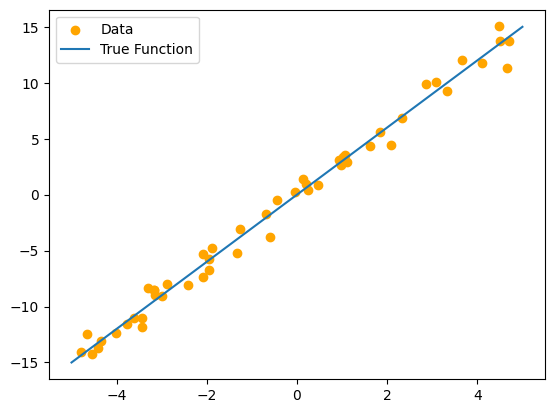

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Generate some data
np.random.seed(42) # for reproducibility

# X = np.linspace(-5, 5)
N = 50
X = np.random.rand(N) * 10 - 5
def myfunction(x, noise=True):
    return x * 3 + (noise * np.random.randn(len(x)))

Y = myfunction(X)
X_clean = np.linspace(-5, 5)
Y_clean = myfunction(X_clean, False)

plt.scatter(X, Y, label='Data', color='orange')
plt.plot(X_clean, Y_clean, label='True Function')

plt.legend()

Now, a linear regression model consists of two parameters, $\theta_0$ and $\theta_1$. The function is modelled as $\theta_1 \times x + \theta_0$

In [2]:
# In code, we can implement this as follows:
def lin_regression_model(theta, x):
    # theta has shape (2,) consisting of [theta0, theta1]
    # x has shape (N, 1), N examples with 1 feature each.
    return theta[1] * x + theta[0]

Now, let us have a measure of how good of a fit a specific model is. One way to do this is to say that the overall cost is represented as $C = \frac{1}{n} \sum_{i=0}^n (y_i - model(x_i))^2$, i.e. the average of the squared distance between the correct and predicted answers.

What we now want to do is to learn the parameters $\theta = [\theta_0, \theta_1]$ that minimise the above cost. Effectively we want the value of theta where $\frac{\partial C}{\partial \theta} = 0$. In general (i.e. beyond linear regression), we cannot solve this analytically, so we resort to an approximation. What we do is have a simple update rule $$\theta_{next} = \theta_{now} - \alpha \frac{\partial C}{\partial \theta}$$

This is repeated for a long time, until we find decent parameters. Note, $\alpha$ is a learning rate, controlling the size of the update step we take.

Let us implement this:


In [3]:
def partial_cost_partial_param(X, Y, theta):
    y_pred = lin_regression_model(theta, X)
    diff = (Y - y_pred)
    
    return np.array([-2 * diff.mean(), -2 * (diff * X).mean()])

def cost(Y, y_pred):
    return np.mean((Y - y_pred)**2)

In [1]:
def train_loop(X, Y):
    theta = [0, 1]
    alpha = 0.01
    for i in range(1000):
        c = cost(Y, lin_regression_model(theta, X))
        print("Epoch ", i, "--", c)
        deriv = partial_cost_partial_param(X, Y, theta)
        theta = theta - alpha * deriv
    return theta

In [5]:
theta = train_loop(X, Y)

Epoch 0 -- 33.98605972913772
Epoch 1 -- 23.66250085236497
Epoch 2 -- 16.55379972447483
Epoch 3 -- 11.658773899957762
Epoch 4 -- 8.28803441507697
Epoch 5 -- 5.966885364504221
Epoch 6 -- 4.3684630228085775
Epoch 7 -- 3.2676971462775226
Epoch 8 -- 2.509609897741725
Epoch 9 -- 1.987487293401955
Epoch 10 -- 1.6278486168438433
Epoch 11 -- 1.3800967401103756
Epoch 12 -- 1.2093915981522418
Epoch 13 -- 1.091743044603749
Epoch 14 -- 1.0106319170169495
Epoch 15 -- 0.9546833882113832
Epoch 16 -- 0.9160648950481454
Epoch 17 -- 0.8893829927705774
Epoch 18 -- 0.8709237567898274
Epoch 19 -- 0.8581297424981876
Epoch 20 -- 0.8492398329225013
Epoch 21 -- 0.8430412468026425
Epoch 22 -- 0.8386987774889465
Epoch 23 -- 0.8356372110212866
Epoch 24 -- 0.8334603620446985
Epoch 25 -- 0.8318953238409658
Epoch 26 -- 0.83075408016435
Epoch 27 -- 0.8299070719793759
Epoch 28 -- 0.8292649960453558
Epoch 29 -- 0.8287662717464046
Epoch 30 -- 0.8283684109361986
Epoch 31 -- 0.8280420753043619
Epoch 32 -- 0.827766984306680

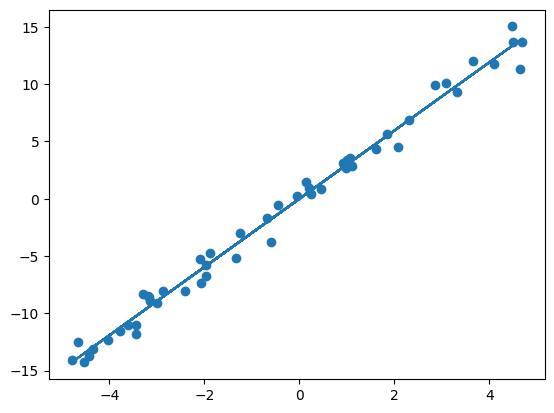

In [6]:
plt.scatter(X, Y)
plt.plot(X, lin_regression_model(theta, X))

### Scikit-learn
In the above example we did everything manually, but that is generally not necessary.


Scikit-learn is a very useful library for simple machine learning, including implementations of algorithms such as SVMs, KNN, Decision Trees, Random Forests, PCA, train-test splitting, etc.

I will not go into too much detail here, but the main structure of an sklearn pipeline is:

```
model = get_model() # Some model defined in their library
model.fit(x_train, y_train)     # train the model
model.predict(x_to_predict)     # use it to make predictions
```

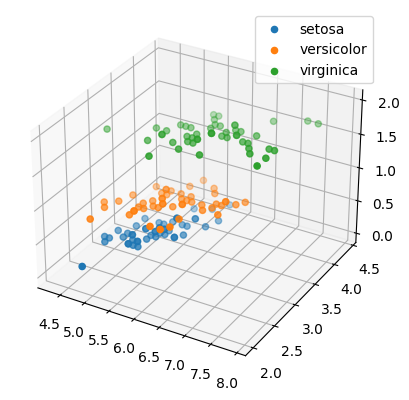

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import sklearn
import sklearn
from sklearn import datasets
# Example adapted from here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
# Plot the data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
np.unique(Y)

for i, name in enumerate(iris.target_names):
    index = (Y == i)
    ax.scatter(X[:, 0][index], X[:, 1][index], Y[index], label=name)
ax.legend() 

In [8]:
from sklearn.linear_model import LogisticRegression
# Simple example, usually you'd have a train / test set.
model = LogisticRegression()
model.fit(X, Y)
predicted_classes = model.predict(X)

In [9]:
(predicted_classes == Y).mean() # 82 percent accuracy

0.82

Text(0.5, 23.52222222222222, 'Predicted')

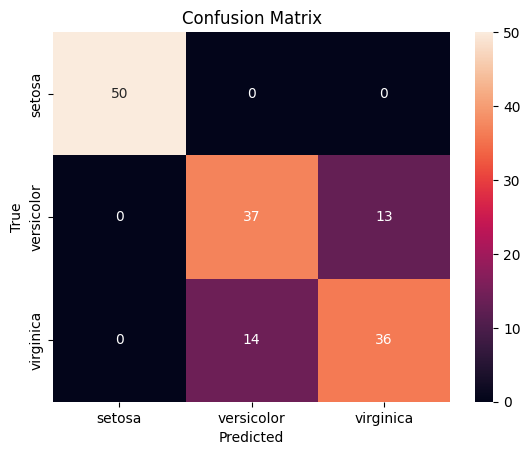

In [10]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y, predicted_classes), annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")

# More Complex ML
Linear and logistic regression are very simple examples of learning a model from data. However, most supervised learning procedures are very similar, i.e.:
1. Get some data $X \in \mathbb{R}^{n \times F}$ and corresponding labels $Y \in \mathbb{R}^{n \times C}$ (generally both of these have multiple dimensions).
2. Form some model that can map between $X$ and $Y$, initially with random parameters.
3. Use some cost function, e.g. mean squared error, crossentropy, etc. indicating how good a solution is.
4. Train this by updating the parameters based on the derivative of the cost function.


Often we split our data into two separate sets, training and validation. The training data is used to train the model, i.e. updating the parameters. The validation data is never used to directly train the model, and so it can be a useful measure of how general your model is. If it focuses too much on the training data, something called overfitting happens. Here, the model does not generalise well to any other data, so it will perform badly on the validation data, while performing near-perfectly on the training data.


## PyTorch
Generally, the models that one uses are more complex that simple linear ones. Most commonly, we use neural networks, which are effectively black boxes, taking in a specific input and returning an output. These models can be highly non-linear, and thus quite powerful.

The two main libraries that are used for ML are [PyTorch](https://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/). Here I will be focusing on PyTorch, as it is quite Pythonic and easy to use. If you know numpy, then most PyTorch functions will be familiar to you. In addition to all of these numpy-like operations, it also allows you to easily define and train neural networks.

In [20]:
import torch
import torch.nn as nn

In [21]:
linear_layer = nn.Linear(10, 20) # A linear layer (similar to our linear regression model) mapping a 10 dimensional input to a 20 dimensional output

In [22]:
x = torch.rand((512, 10))
linear_layer(x).shape

torch.Size([512, 20])

In [23]:
# More complex network
network = nn.Sequential( # Sequentially have multiple layers
    nn.Linear(1, 16),       # A linear layer mapping 1 dimensions to 16.
    nn.ReLU(),              # A non-linear activation function -- necessary in deep networks to make them non-linear.
    nn.Linear(16, 1)        # Linear layer mapping 16 dimensions to 1. Note the 16 must match with the previous dimension.
)

In [29]:
X = np.random.rand(N) * 10 - 5
Y = myfunction(X) ** 2

X_torch = torch.tensor(X, dtype=torch.float32).reshape(-1, 1)
Y_torch = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)
network(X_torch).shape # The Y-values

torch.Size([50, 1])

In [30]:
optim = torch.optim.Adam(network.parameters(), lr=0.03)
loss_func = nn.MSELoss()
for epoch in range(5000):
    output = network(X_torch)
    loss = loss_func(output, Y_torch)
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(loss)

tensor(9628.7539, grad_fn=<MseLossBackward0>)
tensor(9405.7754, grad_fn=<MseLossBackward0>)
tensor(9192.1055, grad_fn=<MseLossBackward0>)
tensor(8987.7070, grad_fn=<MseLossBackward0>)
tensor(8792.5068, grad_fn=<MseLossBackward0>)
tensor(8606.3330, grad_fn=<MseLossBackward0>)
tensor(8428.9160, grad_fn=<MseLossBackward0>)
tensor(8259.8848, grad_fn=<MseLossBackward0>)
tensor(8098.8657, grad_fn=<MseLossBackward0>)
tensor(7945.5176, grad_fn=<MseLossBackward0>)
tensor(7799.5601, grad_fn=<MseLossBackward0>)
tensor(7660.7236, grad_fn=<MseLossBackward0>)
tensor(7528.7886, grad_fn=<MseLossBackward0>)
tensor(7403.5249, grad_fn=<MseLossBackward0>)
tensor(7284.5552, grad_fn=<MseLossBackward0>)
tensor(7171.7520, grad_fn=<MseLossBackward0>)
tensor(7065.1680, grad_fn=<MseLossBackward0>)
tensor(6963.4414, grad_fn=<MseLossBackward0>)
tensor(6866.3418, grad_fn=<MseLossBackward0>)
tensor(6773.9312, grad_fn=<MseLossBackward0>)
tensor(6685.3643, grad_fn=<MseLossBackward0>)
tensor(6599.9092, grad_fn=<MseLoss

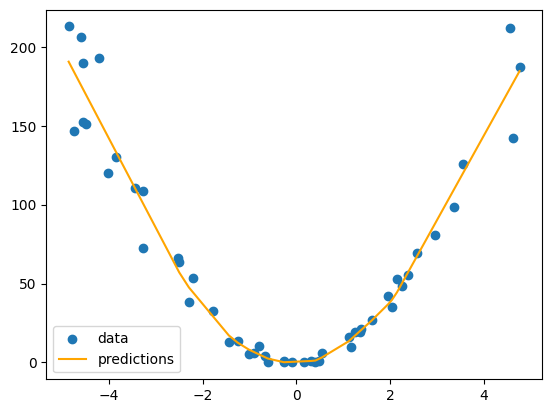

In [46]:
plt.scatter(X, Y, label='data')

sorted_X = X_torch.sort(dim=0).values
plt.plot(sorted_X.detach().cpu().numpy(), network(sorted_X).detach().cpu().numpy(), label='predictions', color='orange')
plt.legend()

This example showcased some Pytorch. In general, linear regression only works for simple relationships, but neural networks are able to learn much more complex functions.

### Other Useful Packages
Here are a few other packages that are very useful for a particular purpose:
- [SciPy](https://scipy.org/): A wide variety of scientific computing, including modules such as `stats` for statistical tests and functions, `optimize` to minimize / maximise functions, numerical methods, differential equations, linear algebra etc.
- [Scikit-Image](https://scikit-image.org/). A bunch of different image processing algorithms and features
- [OpenCV](https://opencv.org/) De facto image processing library in Python.
- [SymPy](https://www.sympy.org/en/index.html) Analytical math operations, e.g. symbolic differentiation / integration / matrix multiplication, etc.

## Conclusion
So, machine learning is pretty easy to get started with, and there are many libraries that make it more convenient to use. PyTorch pretty much uses numpy syntax, but allows us to use the GPU and create and train neural networks.